In [1]:
from lbm.datasets.housing_locations import Preprocessor
import pandas as pd

processor = Preprocessor(include_all_labels=True)
train_loader, val_loader, test_loader = processor.get_loaders()

feature_names = processor.get_feature_names()
label_names = processor.get_label_names()

df1 = pd.DataFrame(columns=feature_names)
df2 = pd.DataFrame(columns=label_names)
for X, Y in train_loader:
    for x in X:
        df1.loc[len(df1)] = x.numpy()
    for y in Y:
        df2.loc[len(df2)] = y.numpy()
display(df1)
display(df2)

,latitude,longitude
0,33.720001,-117.989998
1,34.200001,-118.580002
2,32.720001,-117.110001
3,36.759998,-120.379997
4,34.110001,-118.199997
...,...,...
16341,38.549999,-121.470001
16342,33.860001,-118.160004
16343,33.950001,-118.029999
16344,33.849998,-118.000000


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
16341,0.0,1.0,0.0,0.0,0.0
16342,1.0,0.0,0.0,0.0,0.0
16343,1.0,0.0,0.0,0.0,0.0
16344,1.0,0.0,0.0,0.0,0.0


/Users/jamescataldo/Code/letsbuildmodels/modelenv/lib/python3.12/site-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


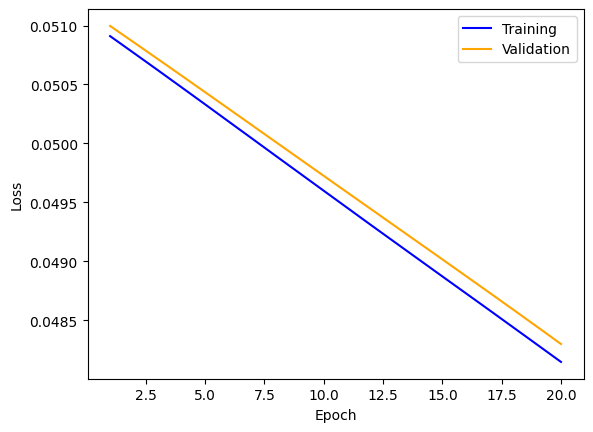

In [2]:
from lbm.models import MultinomialLogistic
from lbm.workflow import train_and_validate
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import numpy as np

means, stds = processor.get_z_score()
model = MultinomialLogistic(len(feature_names), len(label_names), means, stds)

optimizer = optim.SGD(model.parameters(), weight_decay=0.01)
loss_fn = nn.CrossEntropyLoss()
train_losses, val_losses = train_and_validate(
    model,
    train_loader,
    val_loader,
    optimizer,
    loss_fn,
    epochs=20
)
plt.plot(np.arange(1, len(train_losses) + 1), train_losses, label='Training', color='blue')
plt.plot(np.arange(1, len(val_losses) + 1), val_losses, label='Validation', color='orange')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [7]:
from lbm.workflow import avg_accuracy

accuracy = avg_accuracy(model, val_loader)
print(f'Accuracy: {accuracy:.2%}')



Accuracy: 32.60%
